<a href="https://colab.research.google.com/github/santovegafunk/coderhouse-ds-2025/blob/main/ProyectoDSParte2_Nicolas_Angemi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PARTE I**

Importo las librerias que voy a utilizar

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Cargo el dataset a mi notebook y visualizo las columnas


In [2]:
from google.colab import drive
drive.mount('/content/drive')
file_path= '/content/drive/MyDrive/Data Science Coderhouse/Entrega Número 1/Top Hits Spotify 2000-2019 - raw_data.csv'
df= pd.read_csv(file_path)
df.head()

Mounted at /content/drive


,artist,song,duration_ms,duration_mins,explicit,year,popularity,danceability,energy,key_number,...,acousticness,instrumentalness,liveness,valence,tempo,genre_all,genre_1,genre_2,genre_3,genre_4
0,Britney Spears,Oops!...I Did It Again,211160,3.52,False,2000,77,0.751,0.834,1,...,0.3000,0.000018,0.3550,0.894,95.05,pop,pop,NaN,NaN,NaN
1,blink-182,All The Small Things,167066,2.78,False,1999,79,0.434,0.897,0,...,0.0103,0.000000,0.6120,0.684,148.73,"rock, pop",rock,pop,NaN,NaN
2,Faith Hill,Breathe,250546,4.18,False,1999,66,0.529,0.496,7,...,0.1730,0.000000,0.2510,0.278,136.86,"pop, country",pop,country,NaN,NaN
3,Bon Jovi,It's My Life,224493,3.74,False,2000,78,0.551,0.913,0,...,0.0263,0.000013,0.3470,0.544,119.99,"rock, metal",rock,metal,NaN,NaN
4,*NSYNC,Bye Bye Bye,200560,3.34,False,2000,65,0.614,0.928,8,...,0.0408,0.001040,0.0845,0.879,172.66,pop,pop,NaN,NaN,NaN


**Me dejo abajo la interpretacion de los valores en el data set para tener a mano**


---




* **Popularity:** higher the number, more popular the song
* **Danceability:** 0 (least danceable) to 1 (most danceable)
* **Energy:** 0 (low energy) to 1 (high energy)
* **Speachness:** <0.33 (likely no speech); 0.33 > x > 0.66 (music + speech); >0.66 (mainly spoken word track)
* **Acousticness:** 0 (less acoustic) to 1 (more acoustic)
* **Instrumentalness:** >0.5 (more instrumental tracks)
* **Liveliness:** >0.8 more likely to be a live recorded track
* **Valence:** 0 (sad, depressed, angry) to 1 (happy, cheerful, euphoric)


Obtengo valores rapidos sobre la mediana, la media, los minimos y maximos para empezar a entender el dataset

In [3]:
df.describe()

,duration_ms,duration_mins,year,popularity,danceability,energy,key_number,loudness (db),mode_number,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,3.812485,2009.49400,59.872500,0.667438,0.720366,5.378000,-5.512434,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122975
std,39136.569008,0.652465,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967032
min,113000.000000,1.880000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.020000
25%,203580.000000,3.390000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.990000
50%,223279.500000,3.720000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.020000
75%,248133.000000,4.140000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.267500
max,484146.000000,8.070000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.850000


**Primeros insigths con los datos obtenidos arriba:**


---

* **Duración en minutos**:
 * La dispersion es relativamente baja (ya que es menos de un minuto) lo que indica que la mayoria de los temas estan cerca del promedio.
 * Hay algunos valores mas bajos que "bajan" el promedio comparando la media con la mediana.
* **Popularidad**:
 * El desvío estandar aca es un poco mas elevado lo que indica mas variabilidad con respecto a la popularidad promedio de los temas.
 * La mediana sigue siendo mas alta que el promedio, lo que indica que podriamos estar ante una distribucion asimetrica negativa (sesgo a la izquierda)
* **Danzabilidad y energía**:
 * Desvíos estandar bajos y medianas y medias muy cercanas lo que indica poca varibilidad en los datos.
* **Nivel de volumen (loudness):**
 * La mediana y la media estan muy cercanas, junto con relativo poco desvio estandar indica que la mayoria de los temas estar alrededor de -5DB que es lo estandar en la industria musical.
* **Acusticidad:**
 * la mayoria de los temas no son instrumentales, ya que se observa que el promedio, la mediana y los cuartiles estan por debajo de 0,5.
* **Musica en vivo (liveliness):**
 * La gran mayoria de los temas no son grabaciones en vivo, observando que la mediana, la media y los cuartiles son menores a 0,8.
* **Valencia:**
 * Se observa que la mediana y la media son casi iguales con un valor de 0,5, lo que indica que a priori, no se puede concluir si la mayoria de las canciones en el top chart son mas bien alegres o no.
* **Tempo:**
 * La mediana y la media son casi iguales, lo que indicaria con mayor seguridad que la mayoria de las canciones tienen 120 bpm. Sin embargo, el desvío estandard es bastante elevado con 26 bpm (lo cual es mucho en bpm).

**Genero histogramas para validar y acompañar los datos numéricos anteriores**


---



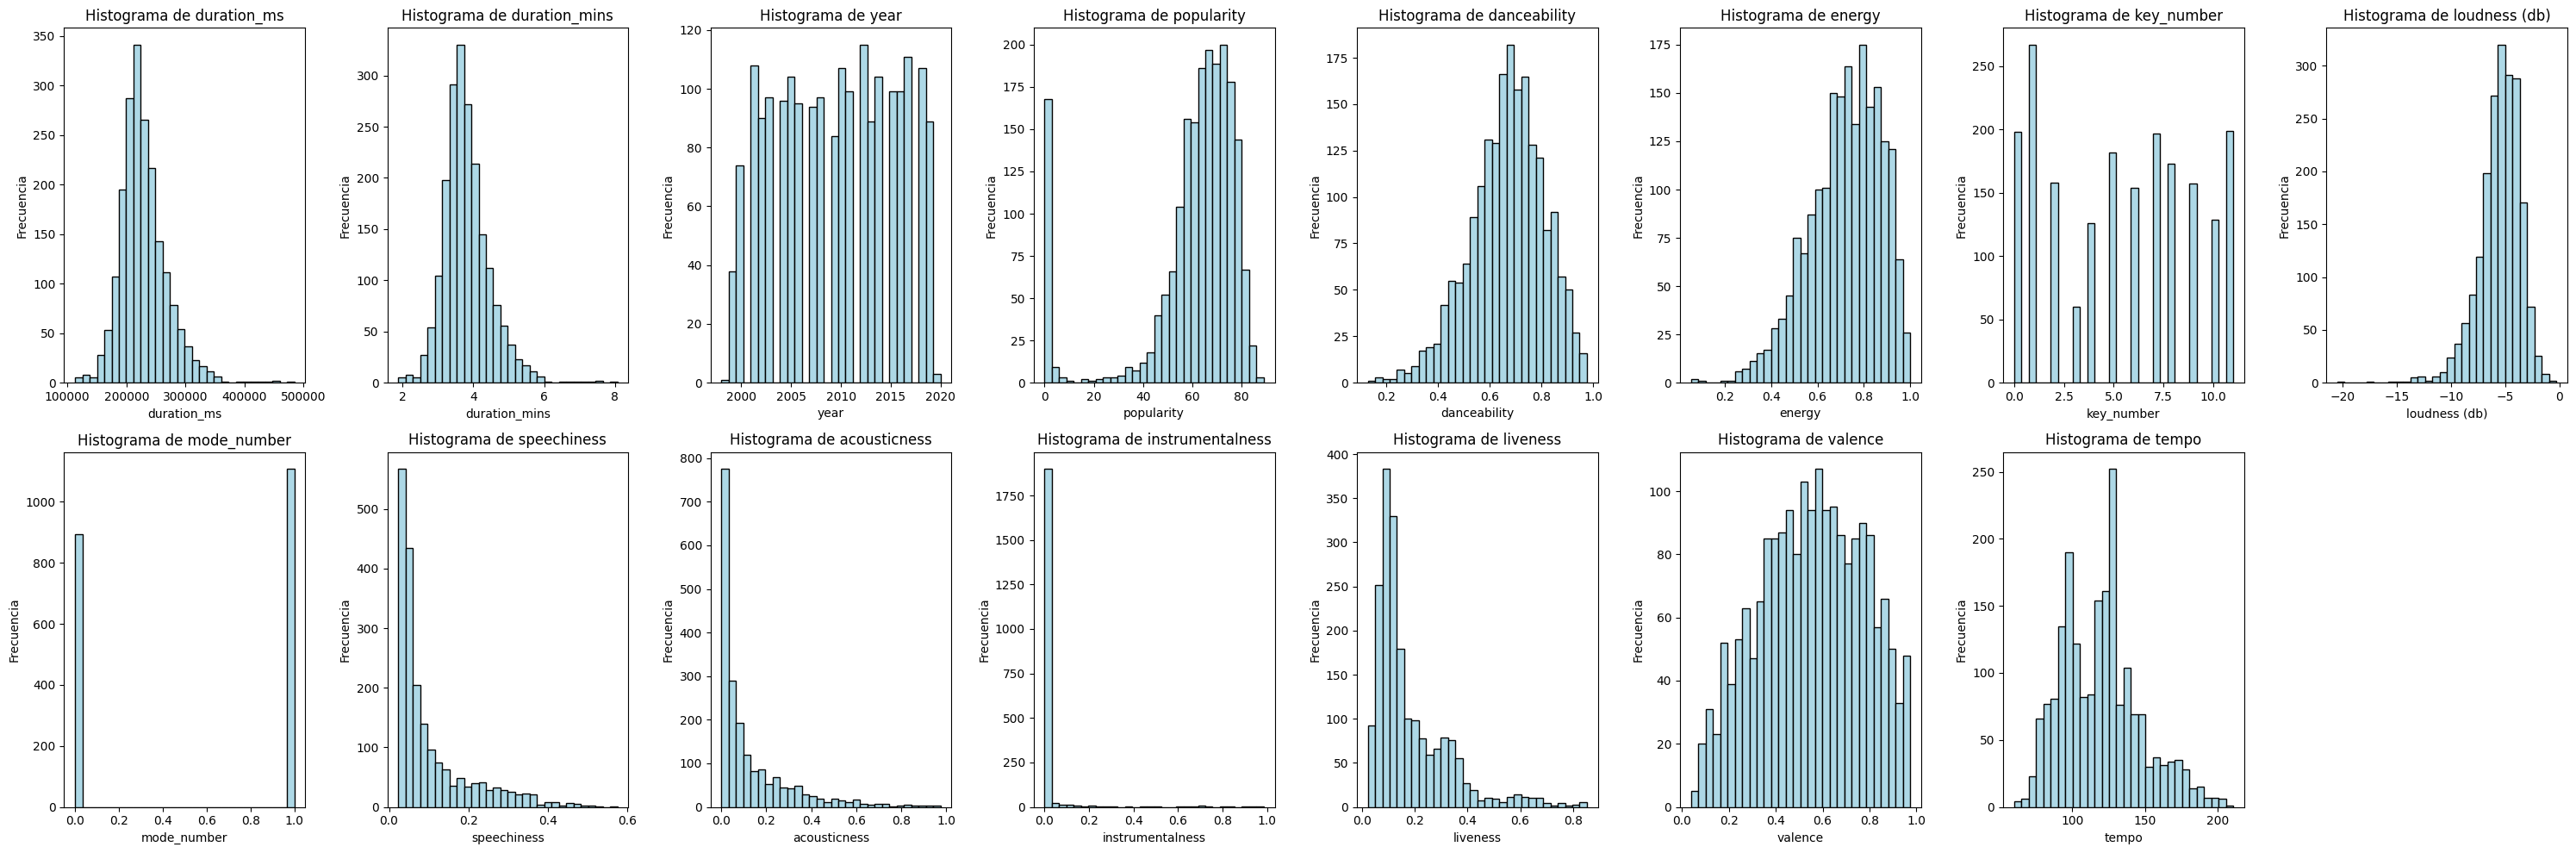

In [4]:
# Selecciono solo las columnas numéricas para generar histogramas solo de esas variables
numerical_cols = df.select_dtypes(include='number').columns

# Número de columnas numéricas
n_cols = len(numerical_cols)

# Defino el tamaño del gráfico
plt.figure(figsize=(30, 10))

# Genero los histogramas
for i, column in enumerate(numerical_cols):
    plt.subplot(2, (n_cols + 1) // 2, i + 1)  # 2 filas, las columnas necesarias
    plt.hist(df[column].dropna(), bins=30, color='lightblue', edgecolor='black')
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Aqui puedo validar que el análisis preliminar númerico es acertado con respecto a los gráficos.
* Un aspecto muy importante que observo en los histogramas es la cantidad de casos donde la popularidad es 0. Esto es un error ya que nunca podria ser cero si la canción está en la lista de los top temas de Spotify. Es por ello que se va a proceder a quitar del análisis a este atributo, ya que no es acertado.
* Otro insight importante es observar que los años donde se lanzaron las canciones está muy distribuido, sin tener un año/años en particular que hayan lanzado mas hits.


In [5]:
# Elimino la columna 'popularity' del DataFrame
df = df.drop(columns=['popularity'])

#  Chequeo que se haya eliminado
df.head()


,artist,song,duration_ms,duration_mins,explicit,year,danceability,energy,key_number,key_letter,...,acousticness,instrumentalness,liveness,valence,tempo,genre_all,genre_1,genre_2,genre_3,genre_4
0,Britney Spears,Oops!...I Did It Again,211160,3.52,False,2000,0.751,0.834,1,C#,...,0.3000,0.000018,0.3550,0.894,95.05,pop,pop,NaN,NaN,NaN
1,blink-182,All The Small Things,167066,2.78,False,1999,0.434,0.897,0,C,...,0.0103,0.000000,0.6120,0.684,148.73,"rock, pop",rock,pop,NaN,NaN
2,Faith Hill,Breathe,250546,4.18,False,1999,0.529,0.496,7,G,...,0.1730,0.000000,0.2510,0.278,136.86,"pop, country",pop,country,NaN,NaN
3,Bon Jovi,It's My Life,224493,3.74,False,2000,0.551,0.913,0,C,...,0.0263,0.000013,0.3470,0.544,119.99,"rock, metal",rock,metal,NaN,NaN
4,*NSYNC,Bye Bye Bye,200560,3.34,False,2000,0.614,0.928,8,G#,...,0.0408,0.001040,0.0845,0.879,172.66,pop,pop,NaN,NaN,NaN


Genero graficos de cajas para validar y obtener mas insights de los valores
numericos anteriores e histogramas


---



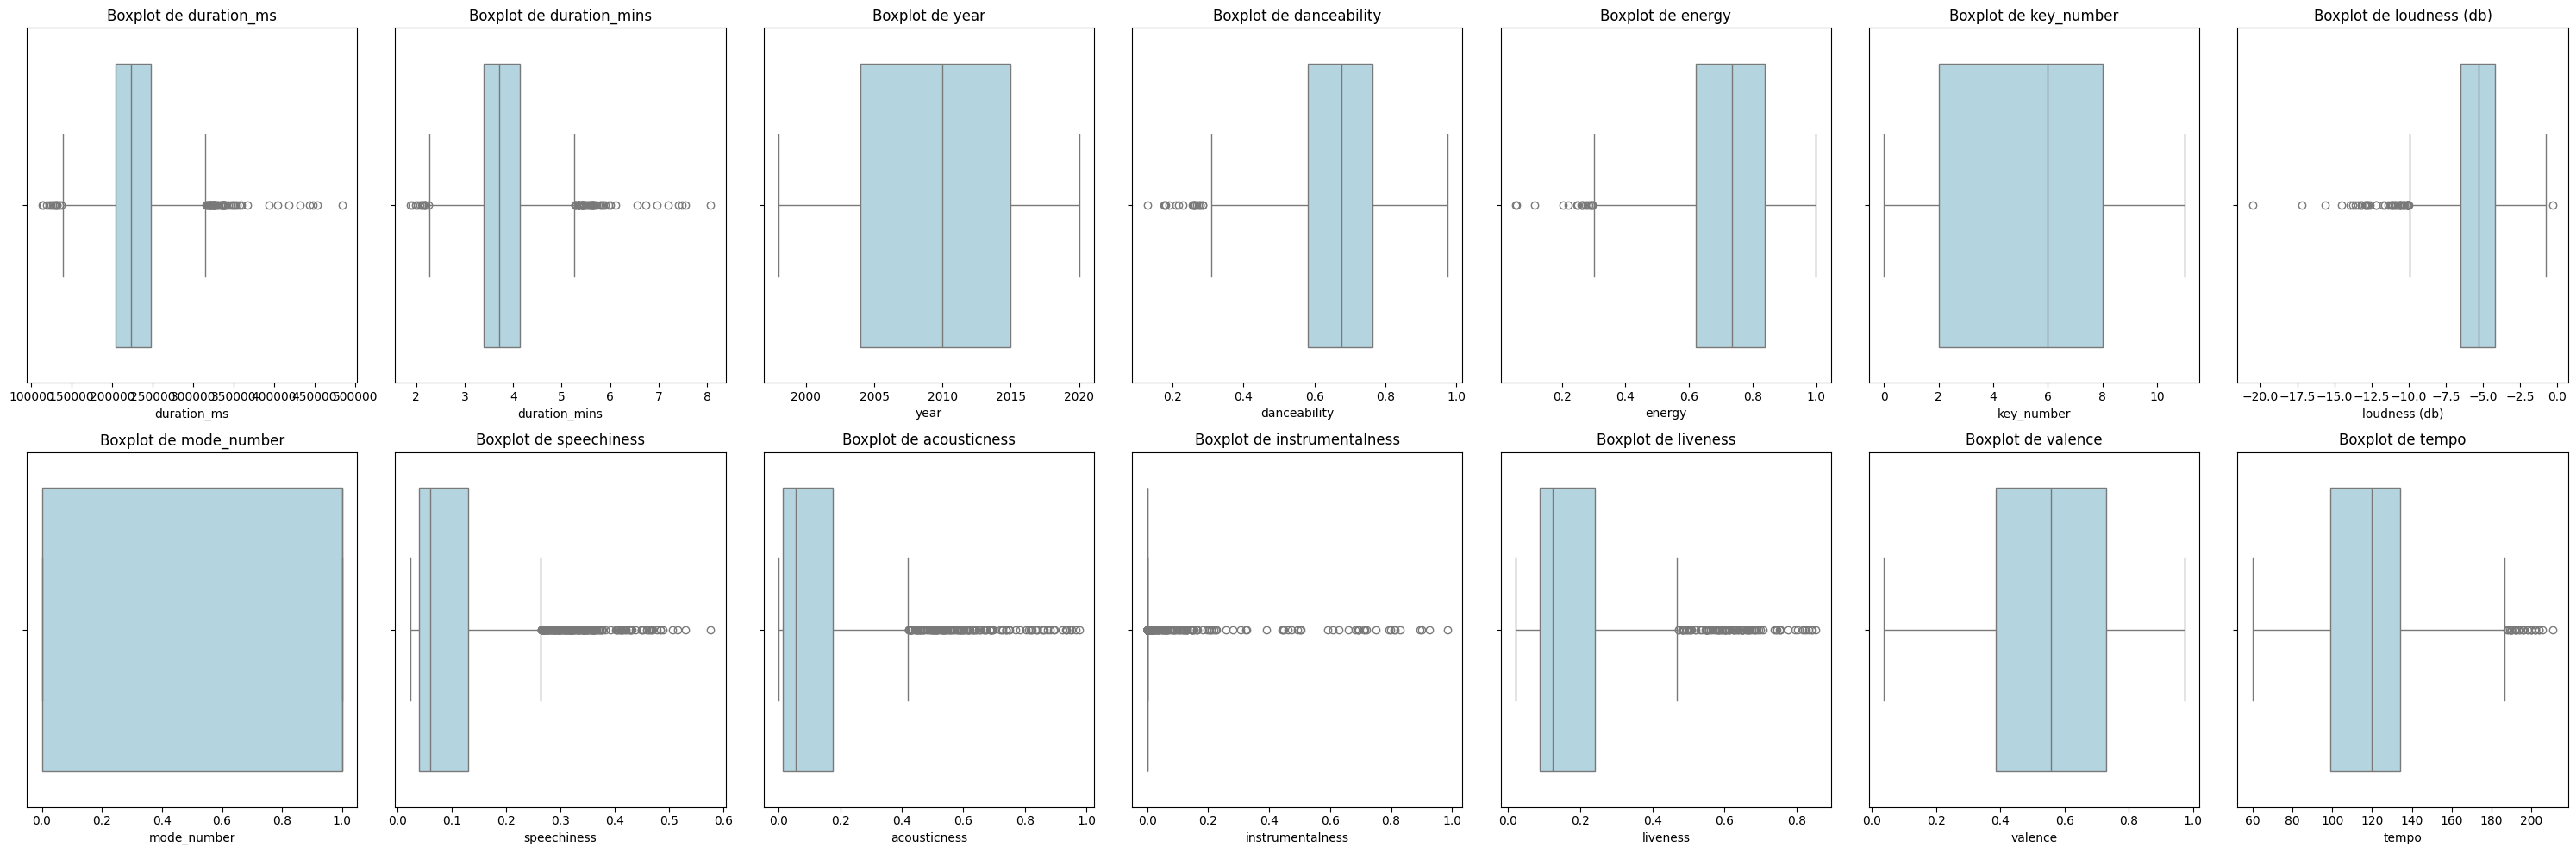

In [6]:
# Selecciono las columnas numéricas
numerical_cols = df.select_dtypes(include='number').columns

# Cantidad de columnas numéricas
n_cols = len(numerical_cols)

# Defino tamaño del gráfico
plt.figure(figsize=(30, 10))

# Creao un boxplot para cada columna
for i, column in enumerate(numerical_cols):
    plt.subplot(2, (n_cols + 1) // 2, i + 1)  # 2 filas, el número necesario de columnas
    sns.boxplot(x=df[column], color='lightblue')
    plt.title(f'Boxplot de {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

**Insigths a partir de los gráficos de caja:**


---



* **Duración en minutos**:
 * La mediana es de alrededor de 3.8 minutos, lo que indica que la mitad de las canciones tienen una duracion menor a este valor y la otra mitad mayor.
 * El rango intercuartilico va dede los 3,5 a 4,5 min, lo que muestra que el 50% de las canciones tienen una duracion dentro de ese rango.
 * Hay outliers que duran menos de 2 minutos y canciones que duran mas de 5 minutos.
 * La duracion promedio de los top hits gira en torno de los 4 minutos.
* **Danzabilidad y energía**:
 * Podemos inferir que la mayoria de los temas son mas bien tendiendo a alta energia y alta danzabilidad tenienedo la mediana mayor a 0,6 y menor a 0,8.
 * Podemos encontrar varios outliers que tienen energia y danzabilidad baja.
* **Nivel de volumen (loudness):**
 * El 50% de los tracks se encuentran entre -6 y -4 db, lo cual tiene sentido con respecto al estandard de la industria.
 * Se observan outliers tanto debajo de -9 db como por arriba de 0 db.
 * La mediana se encuentra por los -5db.
* **Acusticidad:**
 * El 50% de los tracks no se definen como acusticos.
 * Se observan un numero de outliers por arriba de 0,3 indicando prescencia de temas acusticos pero no es un mayoria. Esto nos podria indicar a priori que los top charts contienen temas mas elaborados.
* **Musica en vivo (liveliness):**
 * La gran mayoria de los temas no son grabaciones en vivo, observando que unicamente hay pocos outliers mayores a 0,8.
* **Valencia:**
 * Es interesante ver el grafico ya que se podria inferir que los tracks que son hits estan bastante balanceados en cuanto a la valencia. El 50% de los tracks se encuentran entre 0,4 y 0,7 con la mediana casi en 0,6.  
* **Tempo:**
 * La mediana indica 120 bpm, lo cual podemos inferir a priori queen general.los hits no pertenecerian a generos de musica electronica como el House.
 * El rango intercuartil esta dentro de los 98 y 130 bpm.
 * Se observan varios outliers por arriba de los 180 bpm. Luego de corroborar manualmente, estos casos son temas de hip hop en su mayoria, lo cual se entiende que el tempo puede contarse como la mitad de estos valores, pasando de 200bpm a 100 bpm, lo cual tiene mas sentido para agrupar los valores en esta observación.

**Agrego los siguiente graficos 'Stripplot' para dar refuerzo al análisis anterior y entender como están concentrados los datos**


---



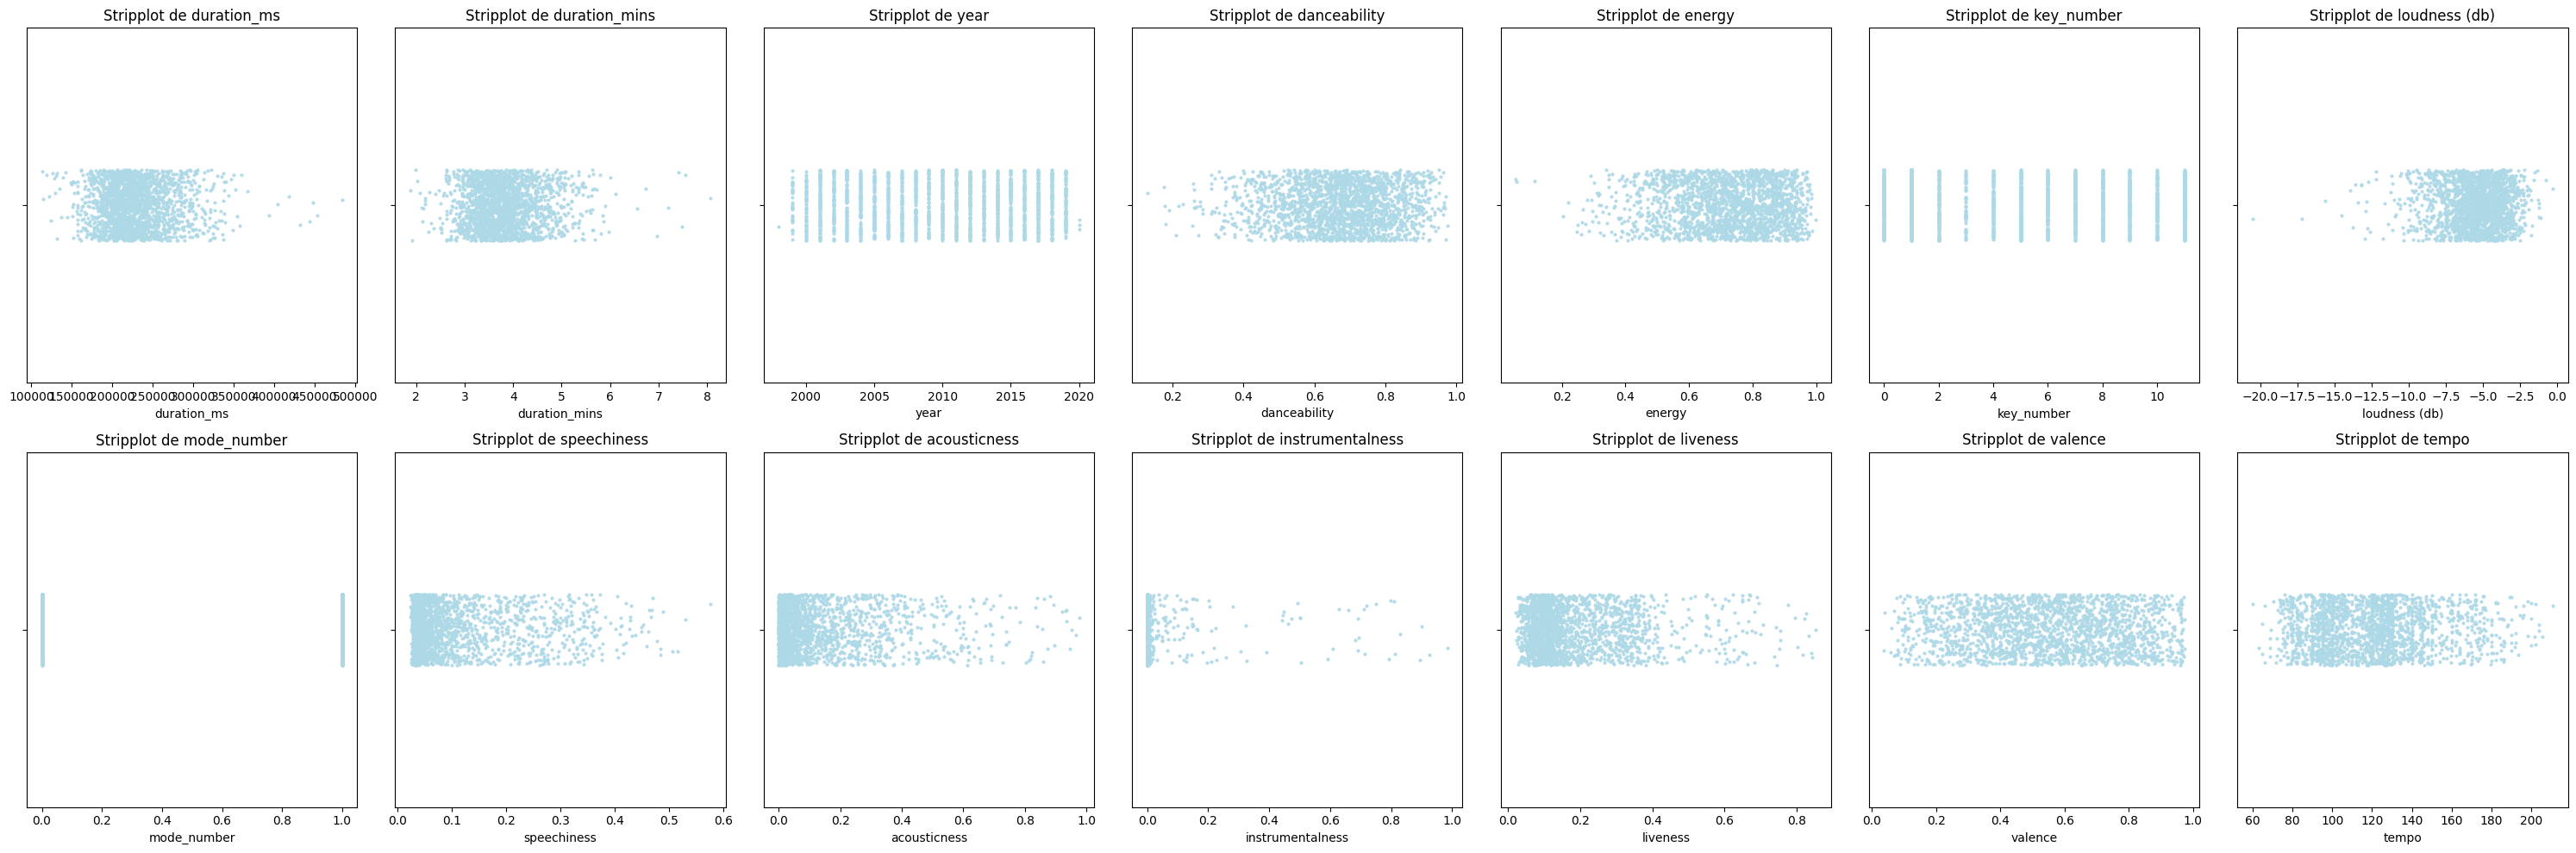

In [7]:
# Selecciono las columnas numéricas
numerical_cols = df.select_dtypes(include='number').columns

plt.figure(figsize=(30, 10))

for i, column in enumerate(numerical_cols):
    plt.subplot(2, (len(numerical_cols) + 1) // 2, i + 1)
    sns.stripplot(x=df[column], color='lightblue', size=3, alpha=0.9)
    plt.title(f'Stripplot de {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

**Primeras conclusiones:**


---



* La mayoría de los temas tienen una duración de entre 3 y 5 minutos.
* La danzabilidad es bastante variada, sin embargo podrias inferir que hay una mayor concentración de temas que son mas danzables.
* En cuanto a la energía, si podemos indicar que la mayoria de estos tracks poseen una energia más bien elevada.
* La mayoría de los temas etan masterizados entre -6 y -1 db.
* La gran mayoría de los tracks no contienen partes habladas, sino mas bien cantadas.
* Casi todos los tracks en este top hits, no son instrumentales.
* Hay muy pocos tracks en el top chart que son grabaciones en vivo.
* La valencia esta muy distribuida a lo largo de los parametros. No podemos encontrar un patrón dentro de las canciones del chart en cuanto a cuan positivas o negativas son.
* El tempo esta bastante distribuido también, con gran parte de los tracks entre los 100 y 140 bpm.

**Distribución de los temas por: modo (mayor/menor), género, tonalidad, contenido explicito y año de lanzamiento:**


---





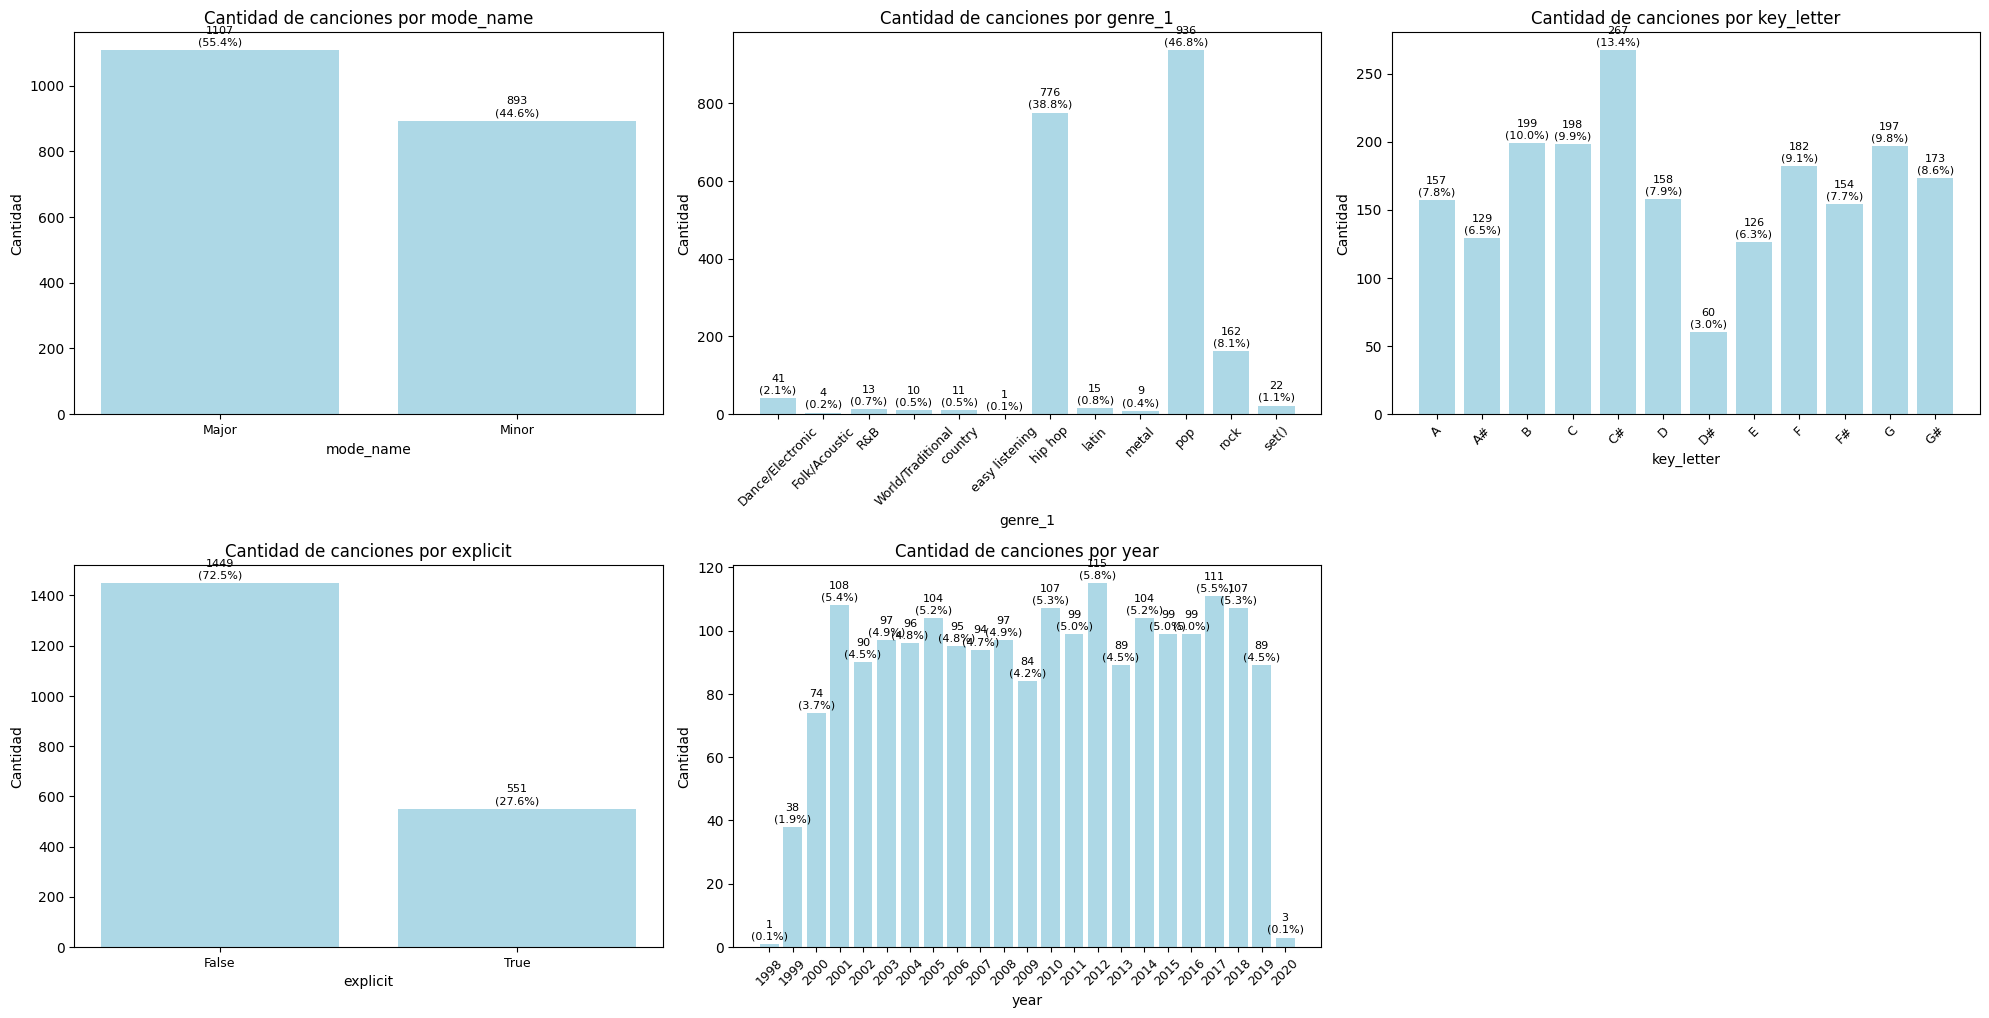

In [8]:
# Lista de columnas a graficar
categorical_cols = ['mode_name', 'genre_1', 'key_letter', 'explicit', 'year']

total_songs = len(df)

plt.figure(figsize=(20, 15))

for i, column in enumerate(categorical_cols):
    ax = plt.subplot(3, 3, i + 1)
    counts = df[column].value_counts().sort_index()

    bars = ax.bar(counts.index.astype(str), counts.values, color='lightblue')

    ax.set_title(f'Cantidad de canciones por {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Cantidad')

    # Rotación y tamaño de fuente de etiquetas
    if len(counts) > 10:
        ax.tick_params(axis='x', rotation=45, labelsize=9)
    else:
        ax.tick_params(axis='x', labelsize=9)

    # Etiquetas con número y porcentaje arriba de las barras
    labels = [f'{count}\n({(count / total_songs) * 100:.1f}%)' for count in counts.values]
    ax.bar_label(ax.containers[0], labels=labels, padding=2, fontsize=8, color='black')

plt.tight_layout()
plt.show()


**Duración de los temas por año de lanzamiento**

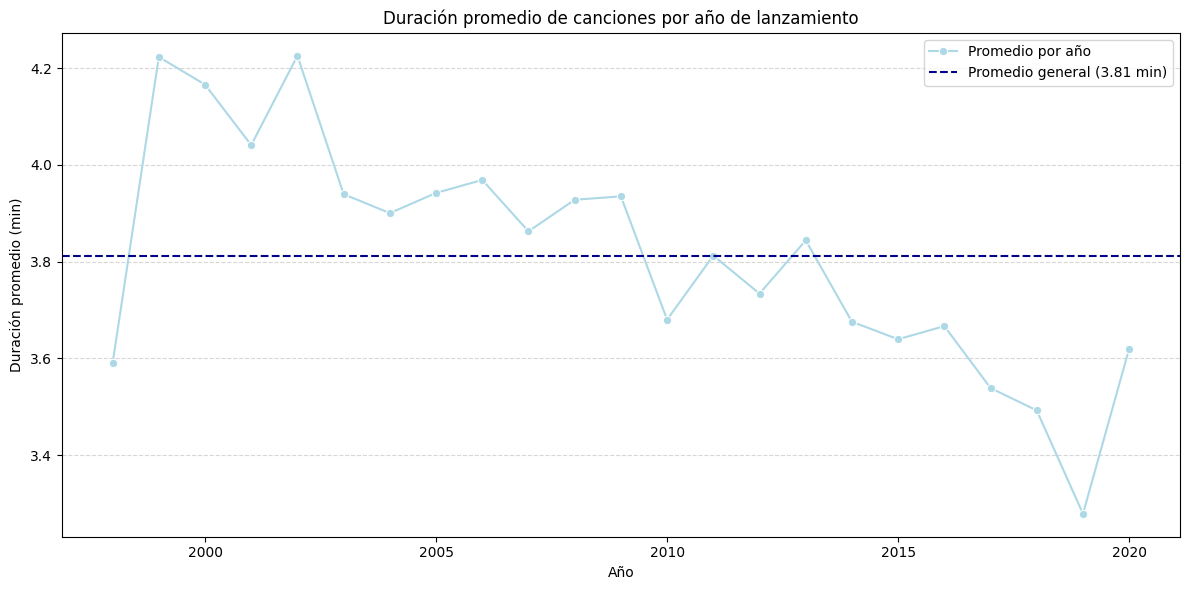

In [9]:
# Calcular la duración promedio por año
average_duration = df.groupby('year')['duration_mins'].mean()

# Calcular la duración promedio general
general_average = df['duration_mins'].mean()

# Crear el gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(x=average_duration.index, y=average_duration.values, color='lightblue', marker='o', label='Promedio por año')

# Agregar la línea horizontal punteada con el promedio general
plt.axhline(general_average, color='darkblue', linestyle='--', label=f'Promedio general ({general_average:.2f} min)')

# Títulos y etiquetas
plt.title('Duración promedio de canciones por año de lanzamiento')
plt.xlabel('Año')
plt.ylabel('Duración promedio (min)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**Diferencias de atributos entre los 3 géneros principales:**

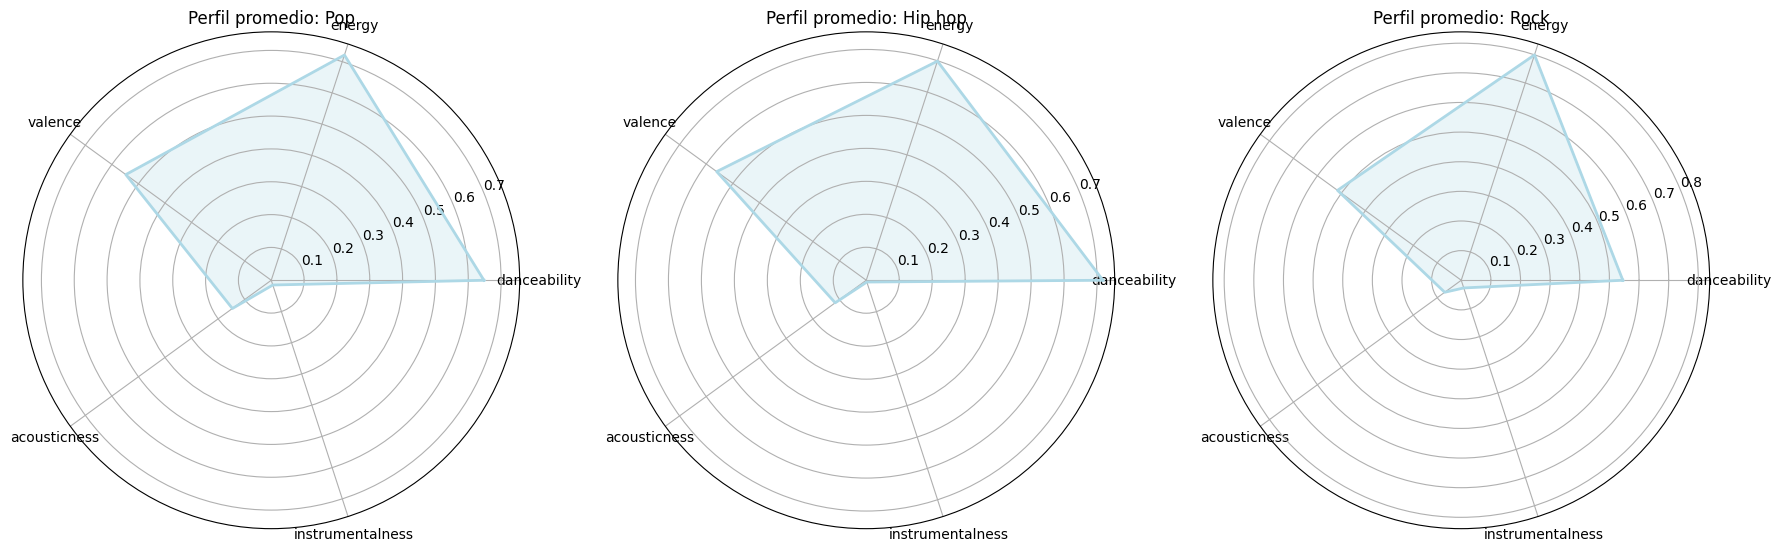

In [10]:
# Columnas a analizar
attributes = ['danceability', 'energy', 'valence', 'acousticness', 'instrumentalness']

# Géneros
genres = ['pop', 'hip hop', 'rock']

# Crear la figura con subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), subplot_kw=dict(polar=True))

for ax, genre in zip(axes, genres):
    # Filtrar y calcular el promedio de cada atributo para el género
    genre_data = df[df['genre_1'] == genre][attributes].mean()

    # Preparar los datos para el radar
    values = genre_data.values.flatten().tolist()
    values += values[:1]

    angles = np.linspace(0, 2 * np.pi, len(attributes), endpoint=False).tolist()
    angles += angles[:1]

    # Dibujar el radar
    ax.plot(angles, values, color='lightblue', linewidth=2)
    ax.fill(angles, values, color='lightblue', alpha=0.25)

    # Ajustar etiquetas y título
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(attributes)
    ax.set_title(f'Perfil promedio: {genre.capitalize()}')

plt.tight_layout()
plt.show()


Se observan que en cuanto a energía son todos muy parecidos. Sin embargo las diferencias principales se dan en danzabilidad, donde el Rock tiene mucho menos puntaje. El Hip Hop y el Pop suelen tener letras mas positivas que las de rock.

**Conclusiones finales de la primera entrega:**

---



1️⃣ ¿Cuáles son los géneros que generan más hits?
* Los géneros principales que dominan las listas son el pop y el hip hop.

2️⃣ ¿Qué tonalidades se usan más?
* Las tonalidades y modos están bastante repartidos, sin un patrón definido.

3️⃣ ¿Cuántos temas hits contienen contenido explícito?
* El 72% de los temas no tienen contenido explícito.

4️⃣ ¿Hay años donde se lanzaron más hits que otros?
* Los hits están bastante repartidos a lo largo de los años, sin que haya un solo año que concentre todos los lanzamientos.

5️⃣ ¿Cómo son los hits en cuanto a danzabilidad y energía?
* La mayoría de los hits tienen niveles altos de energía y danzabilidad.

6️⃣ ¿Qué tan alegres o tristes son los hits?
* No hay un nivel de valencia claro para que un tema sea un hit: puede ser alegre, positivo o triste.

7️⃣ ¿Hay relación entre la duración del tema y los años de lanzamiento?
* Sí. A partir de 2010, los temas tienden a ser más cortos que los lanzados en años anteriores.

NOTA: lamentablemente, uno de los atributos más importantes para el análisis que es del 'popularidad' no contaba con los requisitos mínimos para ser considerado confiable. Con esa data, podría haber defenido mas relaciones entre las variables y que tan popular o no es un tema, dentro del entorno de los tracks considerados como 'Hits'.

# **PARTE II**

**Objetivo**: Crear un algoritmo de clustering para identificar grupos entre canciones para la futura creación de listas, basado en 'sensaciones' (alegres, energéticas, tristes, etc.) y no en géneros musicales (rock, pop, indie, etc.)


**Paso a paso**
- 1) Seleccionar y escalar las variables: danceability, energy, speechiness, acousticness, instrumentalness, liveness, valence, tempo.

- 2) Hacer un análisis de componentes principales (PCA) para visualizar en 2D/3D.

- 3) Aplicar el método del codo (Elbow method) para estimar la mejor cantidad de clusters k.

- 4) Aplicar K-Means con el valor de k elegido.

- 5) Interpretar los clusters: analizar los valores medios por cluster y ponerles un nombre.

In [11]:
# Selecciono solo las columnas numéricas que me interesan
features = ['danceability', 'energy', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo']

df_cluster = df[features].copy()


Genero una matrix de correlación para entender que variables son mas relevantes

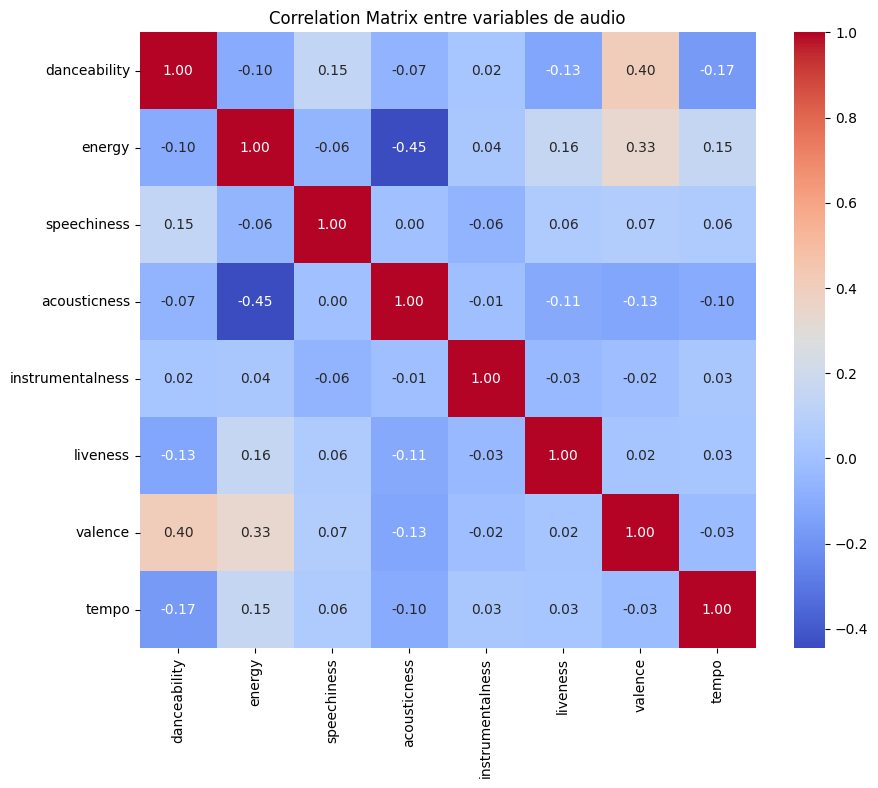

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionamos las variables numéricas que estás usando
features = ['danceability', 'energy', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo']

# Calculamos la matriz de correlación
corr_matrix = df[features].corr()

# Visualizamos la matriz como un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix entre variables de audio")
plt.show()


Observo que las variables mas correlacionadas son las de valencia con energia y danzabilidad. Esto tiene mucho sentido, ya que la valencia (más o menos triste) suele estar muy ligada a si la canción es más enérgica/bailable o no.

Escalar las variables ya que la escala de tempo rompe con el resto de las variables.

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)


Reduzco las variables con PCA y grafico

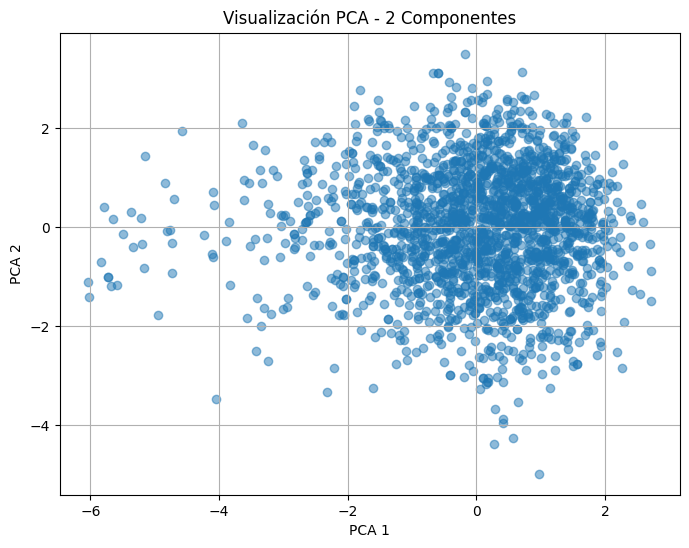

In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Grafico
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:,0], pca_result[:,1], alpha=0.5)
plt.title('Visualización PCA - 2 Componentes')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()


Técnica del codo para definir el número de clusters

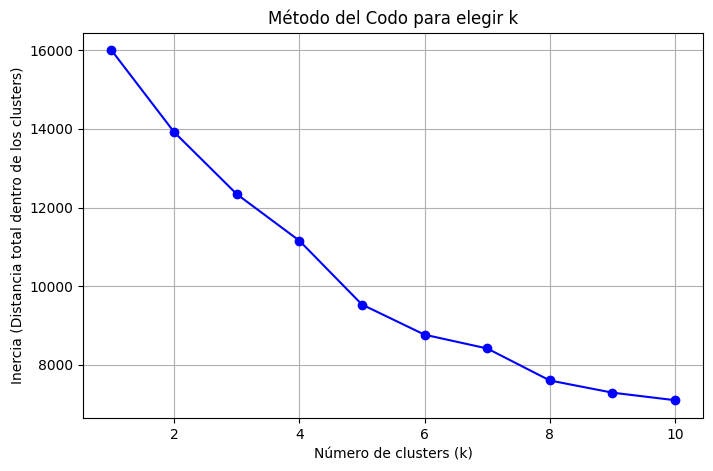

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Pruebo entre 1 y 10 clusters
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia (Distancia total dentro de los clusters)')
plt.title('Método del Codo para elegir k')
plt.grid(True)
plt.show()

#basado en el grafico, considero que el nro ideal de k=5

Entrenamiendo del modelo

In [16]:
from sklearn.cluster import KMeans

# Creamos el modelo con k=5
kmeans = KMeans(n_clusters=5, random_state=42)

# Ajustamos el modelo a los datos escalados
kmeans.fit(df_scaled)

# Agregamos la etiqueta de cluster al dataframe original
df['cluster'] = kmeans.labels_


Visualización de clusters dentro de PCA

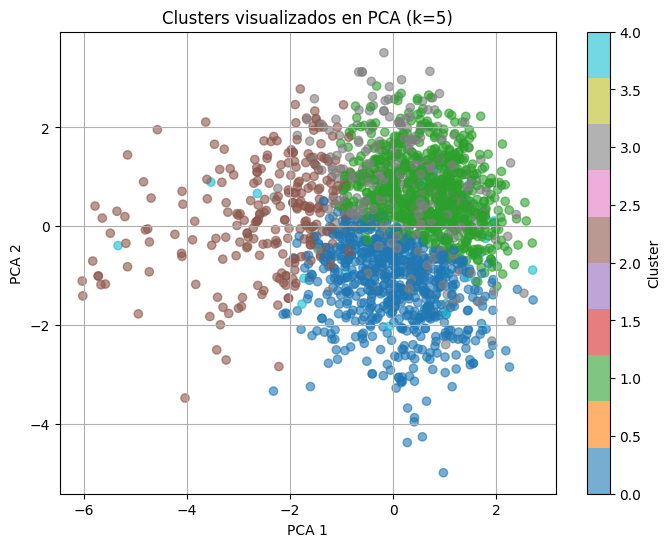

In [17]:
import matplotlib.pyplot as plt

# Usamos los resultados anteriores del PCA
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans.labels_, cmap='tab10', alpha=0.6)
plt.title('Clusters visualizados en PCA (k=5)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()


In [18]:
# Agrupar por cluster y ver los promedios
cluster_summary = df.groupby('cluster')[['danceability', 'energy', 'speechiness','acousticness', 'instrumentalness','liveness', 'valence', 'tempo']].mean()

print(cluster_summary)


         danceability    energy  speechiness  acousticness  instrumentalness  \
cluster                                                                        
0            0.565608  0.762421     0.066847      0.056451          0.006014   
1            0.746609  0.765913     0.071182      0.088214          0.006179   
2            0.625113  0.516661     0.074182      0.450725          0.003372   
3            0.722535  0.689542     0.286968      0.112953          0.001567   
4            0.687774  0.730806     0.068887      0.130950          0.662710   

         liveness   valence       tempo  
cluster                                  
0        0.215849  0.403073  129.100599  
1        0.157337  0.725381  115.624927  
2        0.132431  0.393023  110.199066  
3        0.209067  0.578554  120.024258  
4        0.158313  0.511584  123.821290  


Interpretación de los datos

**Cluster 0 - "High Energy Dance"**
- danceability: 0.56

- energy: 0.76

- acousticness: 0.05 (muy baja)

- instrumentalness: casi 0

- tempo: 129 (alto)

**Interpretación**: canciones muy energéticas, rápidas, poco acústicas y 100% cantadas.

**Cluster 1 - "Happy Groove"**
- danceability: 0.74 (el más alto)

- energy: 0.76

- valence: 0.72 (felices)

- tempo: 115 (más bajo)

- instrumentalness: 0.006

**Interpretación**: canciones muy bailables, alegres, con energía pero no tan rápidas.

**Cluster 2 - "Sad Ballads"**
- acousticness: 0.45 (muy alto)

- energy: 0.51 (bajo)

- valence: 0.39 (bajo)

- tempo: 110 (el más bajo)

**Interpretación**: canciones lentas, tristes o melancólicas, con estilo acústico.

**Cluster 3 - "Spoken flow"**
- speechiness: 0.28 (más del doble que los otros)

- tempo: 120

- instrumentalness: bajo

- valence: 0.57

**Interpretación**: canciones con mucha "habla", probablemente rap o trap.

**Cluster 4 - "Chill Tracks"**
- instrumentalness: 0.66 (¡altísima!)

- acousticness: 0.13 (alta también)

- tempo: 123

- valence: 0.51

**Interpretación**: canciones instrumentales, quizás ambient, electrónica instrumental o intros musicales.

Agregar el cluster al data set para corroborar el modelo

In [19]:
# Asigno las etiquetas del modelo KMeans al DataFrame original
df['cluster'] = kmeans.labels_


Veo las primeras canciones del cluster 0

In [20]:
# Por ejemplo, ver las primeras canciones del cluster 0
df[df['cluster'] == 0][['song', 'artist', 'cluster']].head()


,song,artist,cluster
1,All The Small Things,blink-182,0
2,Breathe,Faith Hill,0
3,It's My Life,Bon Jovi,0
13,Desert Rose,Sting,0
14,Never Be The Same Again,Melanie C,0


In [21]:
# Cantidad de canciones por cluster
print(df['cluster'].value_counts())

cluster
1    751
0    651
3    310
2    257
4     31
Name: count, dtype: int64


Exporto a excel para validar manualmente

In [22]:
# Exportar el DataFrame a un archivo Excel
#df.to_excel('clustering_resultado.xlsx', index=False)

#from google.colab import files
#files.download('clustering_resultado.xlsx')



Basado en los chequeos manuales, observo que la agrupación es bastante acertada, sin embargo no es 100% precisa, como es de esperar. Sospecho también que estos casos donde no son acertados, tienen que ver con la calidad del data set, ya que no se si la data fue exportada directaente de Spotify o fue generada por fuera de la plataforma, haciendo posible ciertas inconsistencias en las features como valencia, danzabilidad, etc.